# Insurance Claim Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

from warnings import filterwarnings 
filterwarnings('ignore')

1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets
appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
Claims_Data=pd.read_csv('C:\\Users\\USER\\Desktop\\analytixlabs\\DSA\\assigmets\\Case study-3//claims.csv')
Claims_Data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [3]:
Cust_Data=pd.read_csv('C:\\Users\\USER\\Desktop\\analytixlabs\\DSA\\assigmets\\Case study-3//cust_demographics.csv')
Cust_Data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [4]:
Cust_Claims=pd.merge(left=Claims_Data,right=Cust_Data,left_on='customer_id',right_on='CUST_ID')
Cust_Claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


2. Perform a data audit for the datatypes and find out if there are any
mismatch within the current datatypes of the columns and their business significance.

In [5]:
Cust_Claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [6]:
Cust_Claims.claim_date=pd.to_datetime(Cust_Claims.claim_date,format='%m/%d/%Y')

In [7]:
Cust_Claims.DateOfBirth=pd.to_datetime(Cust_Claims.DateOfBirth,format='%d-%b-%y')

In [8]:
Cust_Claims.drop(columns=['CUST_ID'],inplace=True)

In [9]:
Cust_Claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   object        
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [10]:
Cust_Claims['claim_amount']=Cust_Claims['claim_amount'].astype('str')
Cust_Claims['claim_amount']=Cust_Claims['claim_amount'].str.strip("$")
Cust_Claims['claim_amount']=Cust_Claims['claim_amount'].astype('float')

In [11]:
Cust_Claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   float64       
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

In [12]:
Cust_Claims.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver


4. Of all the injury claims, some of them have gone unreported with the police.
Create an alert flag (1,0) for all such claims.

In [13]:
Cust_Data["alert flag"]=np.where(Cust_Claims["police_report"]=="Yes",1,0)

In [14]:
Cust_Claims.head(7)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold


5. One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID should remain unique.
Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [15]:
Cust_Claims.drop_duplicates(subset='customer_id',keep="last",inplace=True)

In [16]:
Cust_Claims.duplicated().sum()

0

6. Check for missing values and impute the missing values with an appropriate value.
(mean for continuous and mode for categorical)

In [17]:
Cust_Claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [18]:
Mode=Cust_Claims["total_policy_claims"].mode()
Mode

0    1.0
Name: total_policy_claims, dtype: float64

In [19]:
Mean=Cust_Claims["claim_amount"].mean()
Mean

12501.489634748272

In [20]:
#mode for continuous
Cust_Claims.total_policy_claims.fillna(value=1.0,inplace=True)

In [21]:
#mode for categorical
Cust_Claims.claim_amount.fillna(value=Cust_Claims.claim_amount.mean(),inplace=True)

In [22]:
Cust_Claims.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
dtype: int64

7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [23]:
Cust_Claims["Age"]=dt.datetime.now().year-pd.DatetimeIndex(Cust_Claims["DateOfBirth"]).year

In [24]:
Cust_Claims.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,44
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,53
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,39
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,37
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,46


Cust_Claims["DateOfBirth"]=np.where(Cust_Claims.DateOfBirth.dt.year.astype(int)>2022,Cust_Claims.DateOfBirth-pd.DateOffset(years=100),Cust_claims.DateofBirth)

In [25]:

Cust_Claims['DateOfBirth']=np.where(Cust_Claims.DateOfBirth.dt.year.astype(int)>2022,Cust_Claims.DateOfBirth-pd.DateOffset(years=100),Cust_Claims.DateOfBirth)

In [26]:
Cust_Claims["Age"]=dt.datetime.now().year-pd.DatetimeIndex(Cust_Claims["DateOfBirth"]).year

In [27]:
Cust_Claims.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,44
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,53
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,39
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,37
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,46
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17,NH,419-712-8513,Gold,46
10,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,24
11,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,Male,1999-10-25,AK,256-968-9172,Silver,24
12,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,Male,1993-10-12,ID,142-324-7481,Silver,30
13,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,Female,1966-09-09,RI,165-519-4583,Gold,57


In [28]:
Cust_Claims['Age_Group']=np.where(Cust_Claims.Age<18,'Children',np.where((Cust_Claims.Age>=18) & (Cust_Claims.Age<30),'Youth',np.where(Cust_Claims.Age>60,'Senior',"Adult")))

In [29]:
Cust_Claims.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Age_Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,53,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,39,Adult



8. What is the average amount claimed by the customers from various segments?

In [30]:
Cust_Claims.groupby("Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12846.386178
Platinum,12371.644999
Silver,12267.146560


9. What is the total claim amount based on incident cause for all the claims that have been done
at least 20 days prior to 1st of October, 2018.

In [31]:
from datetime import timedelta

Req_df=pd.DataFrame(Cust_Claims)
End_Date='2018-10-01'
Start_Date=pd.to_datetime(End_Date,format='%Y-%m-%d')- timedelta(days=20)
Incident_Range=(Cust_Claims['claim_date'] >= Start_Date)  & (Cust_Claims['claim_date'] < End_Date)

Req_df=Req_df.loc[Incident_Range]

In [32]:
Req_df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Age_Group
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.000000,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,46,Adult
17,53780662,21240703,Other driver error,2018-09-19,Auto,Unknown,Material only,1050.000000,1.0,No,Male,1963-07-22,MD,473-561-2675,Silver,60,Adult
70,43973221,83290720,Driver error,2018-09-26,Auto,Yes,Material and injury,12501.489635,1.0,No,Male,1966-12-06,VA,185-825-6547,Gold,57,Adult
118,65335959,61810954,Other driver error,2018-09-19,Auto,Unknown,Material and injury,36620.000000,1.0,No,Male,1969-05-18,TX,724-493-6179,Silver,54,Adult
134,4112041,58402401,Other causes,2018-09-12,Auto,Unknown,Material and injury,32710.000000,1.0,No,Male,1979-06-13,KS,134-129-8167,Silver,44,Adult
148,74738945,88449349,Other causes,2018-09-12,Auto,No,Material only,1080.000000,1.0,No,Male,1979-12-17,WA,975-547-5196,Platinum,44,Adult
162,3589979,14490971,Crime,2018-09-19,Auto,No,Material only,1880.000000,4.0,No,Female,1976-12-10,MN,614-652-1274,Silver,47,Adult
193,17871003,98905793,Other driver error,2018-09-19,Auto,Unknown,Material only,3139.500000,3.0,Yes,Female,1993-11-11,ID,823-482-5839,Platinum,30,Adult
224,5694962,9677945,Other causes,2018-09-26,Auto,No,Material only,1520.000000,1.0,No,Female,1987-05-28,SC,849-461-6419,Platinum,36,Adult
305,2581621,18213216,Other causes,2018-09-12,Auto,Unknown,Material and injury,21942.000000,2.0,Yes,Male,1969-10-06,KY,416-461-9145,Silver,54,Adult


In [33]:
Req_df.groupby("incident_cause")[["claim_amount"]].sum()

,claim_amount
incident_cause,
Crime,6840.000000
Driver error,14631.489635
Natural causes,8418.000000
Other causes,247257.489635
Other driver error,47599.500000


10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [34]:
Driver_Issues=Cust_Claims[(Cust_Claims['incident_cause']=='Driver error') | (Cust_Claims['incident_cause']=='Other driver error')]
Driver_Issues

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Age_Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,44,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,39,Adult
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17,NH,419-712-8513,Gold,46,Adult
10,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,24,Youth
14,74165873,99103685,Other driver error,2018-01-13,Home,No,Material only,1495.0,1.0,Yes,Female,1985-12-30,KY,764-439-9856,Gold,38,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,28084004,82089910,Driver error,2018-06-03,Auto,No,Material only,2780.0,1.0,No,Male,1973-10-09,FL,257-248-4825,Silver,50,Adult
1078,47457836,6756905,Driver error,2017-01-21,Auto,No,Material only,2320.0,3.0,No,Male,1997-10-21,NE,924-427-8125,Silver,26,Youth
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,42,Adult
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,33,Adult


In [35]:
Driver_State=Driver_Issues[(Driver_Issues['State']=='TX') | (Driver_Issues['State']=='DE') | (Driver_Issues['State']=='AK')]
Driver_State

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Age_Group
39,70399158,26489135,Driver error,2017-07-01,Auto,No,Material only,1110.000000,1.0,No,Male,1994-10-05,DE,654-456-1493,Platinum,29,Youth
101,4506676,2632562,Other driver error,2018-05-14,Home,Unknown,Material only,1400.000000,1.0,No,Female,1985-12-14,AK,498-597-9658,Platinum,38,Adult
103,82144259,92752865,Driver error,2017-04-25,Auto,No,Injury only,12501.489635,1.0,No,Male,1986-01-30,AK,143-219-5498,Silver,37,Adult
118,65335959,61810954,Other driver error,2018-09-19,Auto,Unknown,Material and injury,36620.000000,1.0,No,Male,1969-05-18,TX,724-493-6179,Silver,54,Adult
147,26716331,3159546,Other driver error,2017-04-25,Auto,No,Injury only,17590.000000,4.0,No,Male,1987-10-20,TX,586-129-9752,Platinum,36,Adult
187,21550521,68772500,Driver error,2018-08-30,Auto,Unknown,Material only,2320.000000,1.0,No,Male,1989-11-10,TX,562-259-5432,Silver,34,Adult
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.489635,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,45,Adult
199,46572741,82415154,Other driver error,2017-06-11,Auto,No,Material and injury,15240.000000,1.0,No,Female,1980-03-08,DE,578-942-1542,Platinum,43,Adult
246,7238381,684748,Other driver error,2018-07-14,Auto,No,Material only,2920.000000,2.0,No,Male,1977-08-03,AK,613-385-2863,Gold,46,Adult
263,31574986,11321295,Driver error,2017-02-03,Auto,No,Material only,2460.000000,2.0,No,Male,1965-11-13,DE,429-596-2169,Platinum,58,Adult


In [36]:
Driver_StateAdult=Driver_State[(Driver_State['Age_Group']=='Adult')]
Driver_StateAdult.groupby('State')[['Age_Group']].count().rename(columns={'Age_Group':'Count'})

,Count
State,
AK,9
DE,10
TX,9


11. Draw a pie chart between the aggregated value of claim amount based on gender and segment.
Represent the claim amount as a percentage on the pie chart.

In [37]:
Gender_seg=pd.pivot_table(data=Cust_Claims,values="claim_amount",index="gender",columns="Segment",aggfunc=sum)
Gender_seg

Segment,Gold,Platinum,Silver
gender,,,
Female,2.110042e+06,2.369720e+06,1.897302e+06
Male,2.655967e+06,2.096443e+06,2.347131e+06


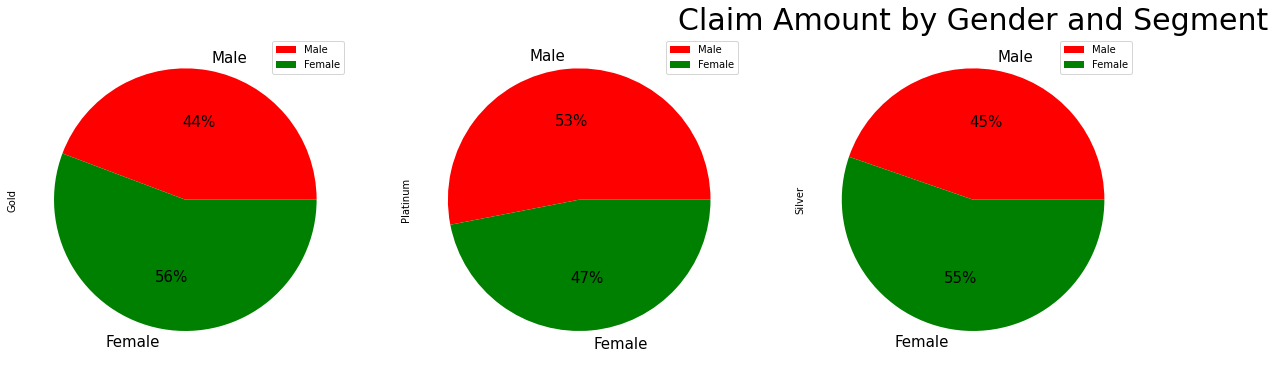

In [38]:
Gender_seg.plot(kind='pie',subplots='true',labels=['Male','Female'],colors=['r','g'],autopct='%1.0f%%',
                   figsize=(20,10),fontsize=15)
plt.title('Claim Amount by Gender and Segment',fontsize=30)

plt.show()


12. Among males and females, which gender had claimed the most for any type of driver related issues?
E.g. This metric can be compared using a bar chart

In [39]:
Driver_Issues

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Age_Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,44,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,39,Adult
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17,NH,419-712-8513,Gold,46,Adult
10,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,24,Youth
14,74165873,99103685,Other driver error,2018-01-13,Home,No,Material only,1495.0,1.0,Yes,Female,1985-12-30,KY,764-439-9856,Gold,38,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,28084004,82089910,Driver error,2018-06-03,Auto,No,Material only,2780.0,1.0,No,Male,1973-10-09,FL,257-248-4825,Silver,50,Adult
1078,47457836,6756905,Driver error,2017-01-21,Auto,No,Material only,2320.0,3.0,No,Male,1997-10-21,NE,924-427-8125,Silver,26,Youth
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,42,Adult
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,33,Adult


In [40]:
gender_driver=Driver_Issues.groupby("gender")[["claim_amount"]].sum()
gender_driver

,claim_amount
gender,
Female,3.136715e+06
Male,3.975408e+06


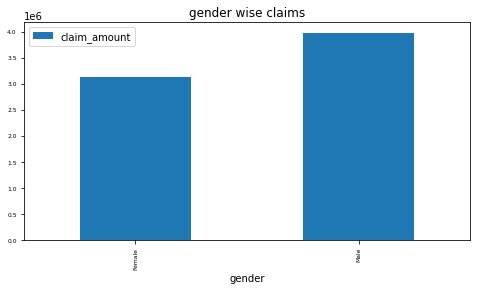

In [41]:
gender_driver.plot(kind="bar",figsize=(8,4),title="gender wise claims",fontsize=6)
plt.show()

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [42]:
fraud_claims=Cust_Claims.loc[Cust_Claims["fraudulent"]=="Yes"]

In [43]:
Fraud_ClaimsGroup=fraud_claims.groupby(['Age_Group','fraudulent'])[['fraudulent']].count().rename(columns={'fraudulent':'Count'})
Fraud_ClaimsGroup

,,Count
Age_Group,fraudulent,
Adult,Yes,193
Senior,Yes,21
Youth,Yes,31


<AxesSubplot:title={'center':'Fraudulent Claims according to Age Group'}, xlabel='Age_Group,fraudulent', ylabel='Count'>

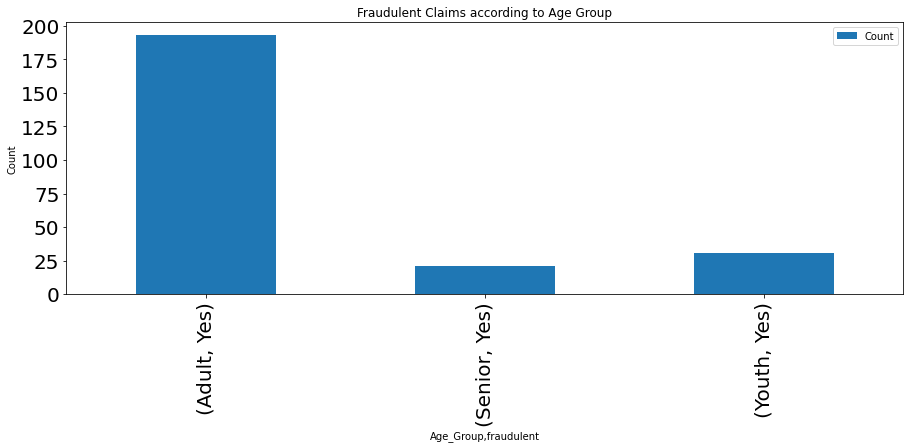

In [44]:
Fraud_ClaimsGroup.plot(kind='bar',ylabel='Count',title='Fraudulent Claims according to Age Group',figsize=(15,5),fontsize=20)

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers.
Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [45]:
Cust_Claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Age_Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,53,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,39,Adult
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,37,Adult
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,46,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,42,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,27,Youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,33,Adult
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,1964-10-22,LA,469-345-5617,Silver,59,Adult


In [46]:
Cust_Claims["claim_month"]=pd.to_datetime(Cust_Claims["claim_date"])
Cust_Claims["claim_month"]=Cust_Claims["claim_month"].dt.month

Text(0.5, 1.0, 'Total amount')

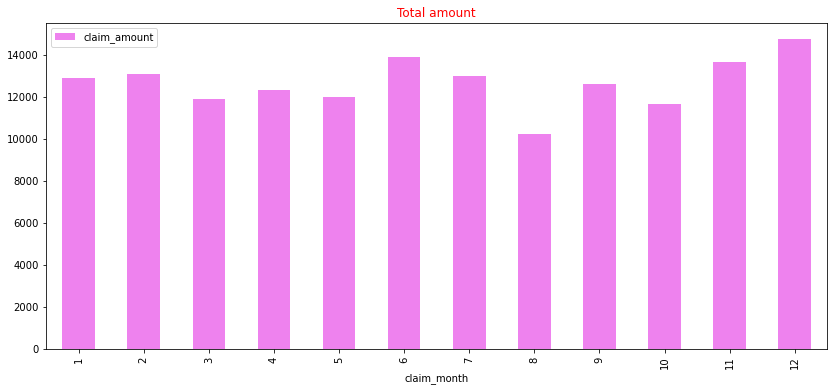

In [47]:
pd.pivot_table(Cust_Claims,index='claim_month',values='claim_amount').plot(kind='bar',figsize=(14,6),color='violet')
plt.title("Total amount",color='red')

15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.m

In [48]:
Cust_Claims.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Age_Group,claim_month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,44,Adult,11
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,53,Adult,10
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,39,Adult,4


In [49]:
fraud=Cust_Claims.loc[Cust_Claims.fraudulent=="Yes"].groupby(["gender","Age_Group"])[["claim_amount"]].mean().add_prefix('fraud_')
Non_fraud=Cust_Claims.loc[Cust_Claims.fraudulent=="No"].groupby(["gender","Age_Group"])[["claim_amount"]].mean().add_prefix('Non_fraud_')

In [50]:
Non_fraud

Non_fraud_claim_amount
gender Age_Group                        
Female Adult                12037.499666
       Senior               14965.372409
       Youth                13149.624543
Male   Adult                12090.218657
       Senior               12607.765976
       Youth                13277.985837

In [51]:
Claims_age_gender=round(pd.merge(fraud,Non_fraud,on=["gender","Age_Group"]),2)
Claims_age_gender

fraud_claim_amount  Non_fraud_claim_amount
gender Age_Group                                            
Female Adult                12298.49                12037.50
       Senior                3779.08                14965.37
       Youth                10144.56                13149.62
Male   Adult                15618.01                12090.22
       Senior               16879.12                12607.77
       Youth                 8937.87                13277.99

array([<AxesSubplot:title={'center':'fraud_claim_amount'}, xlabel='gender,Age_Group'>,
       <AxesSubplot:title={'center':'Non_fraud_claim_amount'}, xlabel='gender,Age_Group'>],
      dtype=object)

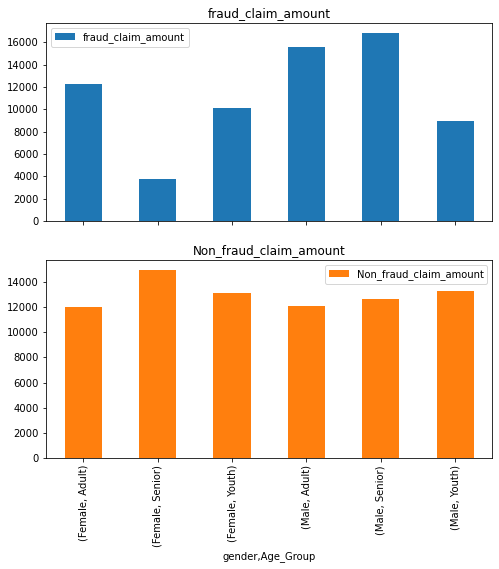

In [52]:
Claims_age_gender.plot(kind='bar',subplots=True,figsize=(8,8))

16. Is there any similarity in the amount claimed by males and females?

In [53]:
claims_male=Cust_Claims["claim_amount"].loc[Cust_Claims["gender"]=="Male"]
claims_female=Cust_Claims["claim_amount"].loc[Cust_Claims["gender"]=="Female"]

In [54]:
claims_male.mean()

12884.829631308425

In [55]:
claims_female.mean()

12100.692029236623

In [56]:
import scipy.stats as stats
similarity=stats.ttest_ind(a=claims_male,b=claims_female,equal_var=True)
similarity.statistic

0.9630529881732577

In [57]:
unequal=stats.ttest_ind(a=claims_male,b=claims_female,equal_var=False)
unequal.statistic

0.9637241707490979

In [58]:
unequal.statistic-similarity.statistic

0.0006711825758402012

In [59]:
p_value=similarity.pvalue
p_value

0.3357373087404285

In [60]:
if(p_value<0.05):
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis/there is some relationship between the two")

We fail to reject null hypothesis/there is some relationship between the two


Q17. Is there any relationship between age category and segment?

In [61]:
age_segment_relation=pd.crosstab(Cust_Claims["Age_Group"],Cust_Claims["Segment"],margins=True)

In [62]:
age_segment_relation

Segment,Gold,Platinum,Silver,All
Age_Group,,,,
Adult,287,276,266,829
Senior,28,26,21,75
Youth,56,59,59,174
All,371,361,346,1078


In [63]:
chi_test=stats.chi2_contingency(observed=age_segment_relation)
chi_test

(1.0671354683268621,
 0.9992665662291643,
 9,
 array([[ 285.30519481,  277.61502783,  266.07977737,  829.        ],
        [  25.81168831,   25.11595547,   24.07235622,   75.        ],
        [  59.88311688,   58.2690167 ,   55.84786642,  174.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [64]:
chi_test_stats=chi_test[0]
chi_test_stats

1.0671354683268621

In [65]:
p_test=chi_test[1]
p_test

0.9992665662291643

In [66]:
#p value is greater than 0.05, we fail reject the null hypothesis. 
#Therefore there is no relationship between age category and segment

#18.The current year has shown a significant rise in claim amounts as
compared to 2016-17 fiscal average which was $10,000

In [67]:
Cust_Claims["claim_date_year"]=Cust_Claims["claim_date"].dt.year
Cust_Claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Age_Group,claim_month,claim_date_year
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,44,Adult,11,2017
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,53,Adult,10,2018
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,39,Adult,4,2018
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,37,Adult,4,2017
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,46,Adult,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,42,Adult,9,2018
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,27,Youth,5,2017
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,33,Adult,5,2017
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,1964-10-22,LA,469-345-5617,Silver,59,Adult,4,2017


In [68]:
Cust_Claims["claim_date_year"].value_counts()

2017    594
2018    484
Name: claim_date_year, dtype: int64

In [70]:
Cust_Claims[["claim_date_year","claim_amount"]].groupby("claim_date_year").mean()

,claim_amount
claim_date_year,
2017,12285.735149
2018,12766.279231


In [72]:
year_2017=Cust_Claims.claim_amount[Cust_Claims.claim_date_year==2017]
year_2018=Cust_Claims.claim_amount[Cust_Claims.claim_date_year==2018]

In [73]:
stats.f_oneway(year_2017,year_2018)

F_onewayResult(statistic=0.34468054956148225, pvalue=0.5572630625955097)

In [74]:
stats.ttest_ind(year_2017,year_2018)

Ttest_indResult(statistic=-0.5870950089734057, pvalue=0.5572630625953376)

In [75]:
# p value is big in this example is the percentage of observation that are common(overlap is big 60% approx.)
#as my p value is bigger ,we cannot reject null hypothesis
#can't conclude that the current year has shown a significant rise in claim amounts 

Q19
H0 : (No difference between age groups and insurance claims or No influence of age groups on insurance claims)

Ha : (There is some difference between age groups and insurance claims or there is some influence of age groups on insurance claims)

In [80]:
#converting age-group into categorical variable
Cust_Claims["Age_Group_cat"]=np.where((Cust_Claims.Age.astype(int)<18),1,np.where(((Cust_Claims.Age.astype(int)>18) & (Cust_Claims.Age.astype(int)<30)),2,
                                     np.where(((Cust_Claims.Age.astype(int)>=30) & (Cust_Claims.Age.astype(int)<60)),3,4)))

In [81]:
Cust_Claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age,Age_Group,claim_month,claim_date_year,Age_Group_cat
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,44,Adult,11,2017,3
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,53,Adult,10,2018,3
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,39,Adult,4,2018,3
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,37,Adult,4,2017,3
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,46,Adult,9,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,42,Adult,9,2018,3
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,27,Youth,5,2017,2
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,33,Adult,5,2017,3
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,1964-10-22,LA,469-345-5617,Silver,59,Adult,4,2017,3


In [82]:
Cust_Claims["total_policy_claims"].value_counts()

1.0    789
2.0    105
3.0     85
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [84]:
ct=pd.crosstab(Cust_Claims.total_policy_claims,Cust_Claims.Age_Group_cat,margins=True)
ct

Age_Group_cat,2,3,4,All
total_policy_claims,,,,
1.0,127,584,78,789
2.0,15,82,8,105
3.0,12,67,6,85
4.0,10,43,6,59
5.0,7,16,4,27
6.0,1,9,0,10
7.0,1,1,0,2
8.0,1,0,0,1
All,174,802,102,1078


In [85]:
stats.chi2_contingency(ct)

(13.714587177850316,
 0.952836095172408,
 24,
 array([[1.27352505e+02, 5.86992579e+02, 7.46549165e+01, 7.89000000e+02],
        [1.69480519e+01, 7.81168831e+01, 9.93506494e+00, 1.05000000e+02],
        [1.37198516e+01, 6.32374768e+01, 8.04267161e+00, 8.50000000e+01],
        [9.52319109e+00, 4.38942486e+01, 5.58256030e+00, 5.90000000e+01],
        [4.35807050e+00, 2.00871985e+01, 2.55473098e+00, 2.70000000e+01],
        [1.61410019e+00, 7.43970315e+00, 9.46196660e-01, 1.00000000e+01],
        [3.22820037e-01, 1.48794063e+00, 1.89239332e-01, 2.00000000e+00],
        [1.61410019e-01, 7.43970315e-01, 9.46196660e-02, 1.00000000e+00],
        [1.74000000e+02, 8.02000000e+02, 1.02000000e+02, 1.07800000e+03]]))

Since the p value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

Q20. Is there any relationship between total number of policy claims and the claimed amount?

In [87]:
Cust_Claims.total_policy_claims.corr(other=Cust_Claims.claim_amount)

-0.022392720732099896

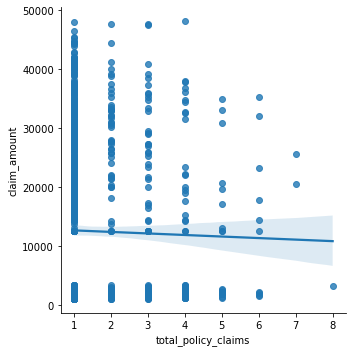

In [91]:
import seaborn as sns
sns.lmplot(x = "total_policy_claims", y = "claim_amount",data = Cust_Claims)